# Exercise 1: Calculate posterior probability

Assume that our animal observed the light intensity $u = 2$, the level of noise in its receptor is $\Sigma_u=1$, and the mean and variance of its prior expectation of size are $v_p=3$ and $\Sigma_p=1$. Write a computer program that computes the posterior probabilities of sizes from $0.01$ to $5$, and plots them.
$$
p(u|v) = f(u; g(v), \Sigma_u)
$$

$$
g(v) = v^2
$$

$$
p(v) = f(v; v_p, \Sigma_p)
$$

$$
p(u) = \int_v p(v) p(u|v) dv
$$


$$
p(v|u) = \frac{p(v) p(u|v)}{p(u)}
$$


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Parameters

In [2]:
dv = 0.01 # stepsize
u = 2 # light intensity data point
sigma_u = 1 # sigma likelihood
v_p = 3 # mean of prior distribution
sigma_p = 1 # sigma for prior
v_range = np.arange(0.01, 5, dv) # get the range of possible item sizes with stepsize


## Compute the posterior

In [3]:
g_v = v_range**2 # g(v) = v**2
lkl = sp.stats.norm.pdf(u, g_v, sigma_u) # likelihood
prior = sp.stats.norm.pdf(v_range, v_p, sigma_p) # prior
norm = sum((lkl*prior)*dv) # normalize
posterior = (lkl * prior) / norm # compute the posterior


## Plot

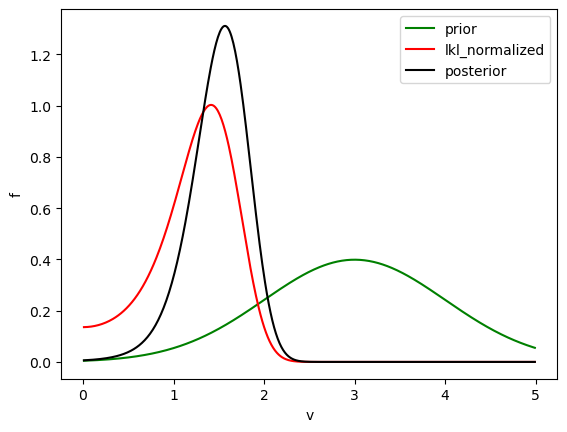

In [4]:
lkl_norm = lkl/sum(lkl*dv) # normalize the likelhood that it fits

plt.plot(v_range,prior, color = 'green', label = 'prior')
plt.plot(v_range,lkl_norm, color = 'red', label = 'lkl_normalized')
plt.plot(v_range,posterior, color = 'black', label = 'posterior')
plt.legend()
plt.ylabel('f')
plt.xlabel('v')
plt.show()

### The posterior is a proper PDF

$
\int_v p(v|u) dv= 1
$

In [5]:
round(sum(posterior * dv),3)

1.0